In [1]:
import config
import wandb
import numpy as np
from dotenv import load_dotenv
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from utils import modelling

In [2]:
load_dotenv()

True

In [3]:
api = wandb.Api()

In [4]:
sweep_id = "jw3e0e34"
sweep = api.sweep(f"{config.WANDB_ENTITY}/{config.WANDB_PROJECT}/{sweep_id}")
runs = sweep.runs

best_run = max(
    runs,
    key=lambda run: run.summary.get("val-rmse", np.inf),
)

In [5]:
for f in best_run.files():
    if f.name.endswith("_model.json"):
        model_file = f

In [6]:
model_file.download(exist_ok=True)

<_io.TextIOWrapper name='./storm_min_bt_20250819_092459_9ae49c4c_model.json' mode='r' encoding='UTF-8'>

In [7]:
bst = xgb.Booster()
bst.load_model(f"./{model_file.name}")

In [8]:
# load the processed dataset
print("Loading processed dataset...")
processed_df = pd.read_csv(
    config.PROCESSED_DATASET_PATH, parse_dates=["timestamp"]
)

Loading processed dataset...


In [25]:
processed_df["storm_min_bt"].describe()

count    588915.000000
mean        200.687437
std           9.171643
min         178.790000
25%         193.680000
50%         199.860000
75%         206.990000
max         229.520000
Name: storm_min_bt, dtype: float64

In [9]:
X, y = modelling.separate_features_and_target(processed_df, "storm_min_bt")

In [10]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=config.TEST_SIZE, random_state=config.RANDOM_STATE
)

In [11]:
X_test = X_test.sample(frac=0.1, random_state=config.RANDOM_STATE)

In [12]:
import shap

In [13]:
explainer = shap.TreeExplainer(bst)

In [14]:
shap_values = explainer(X_test)
# shap_interaction_values = explainer.shap_interaction_values(X_test)

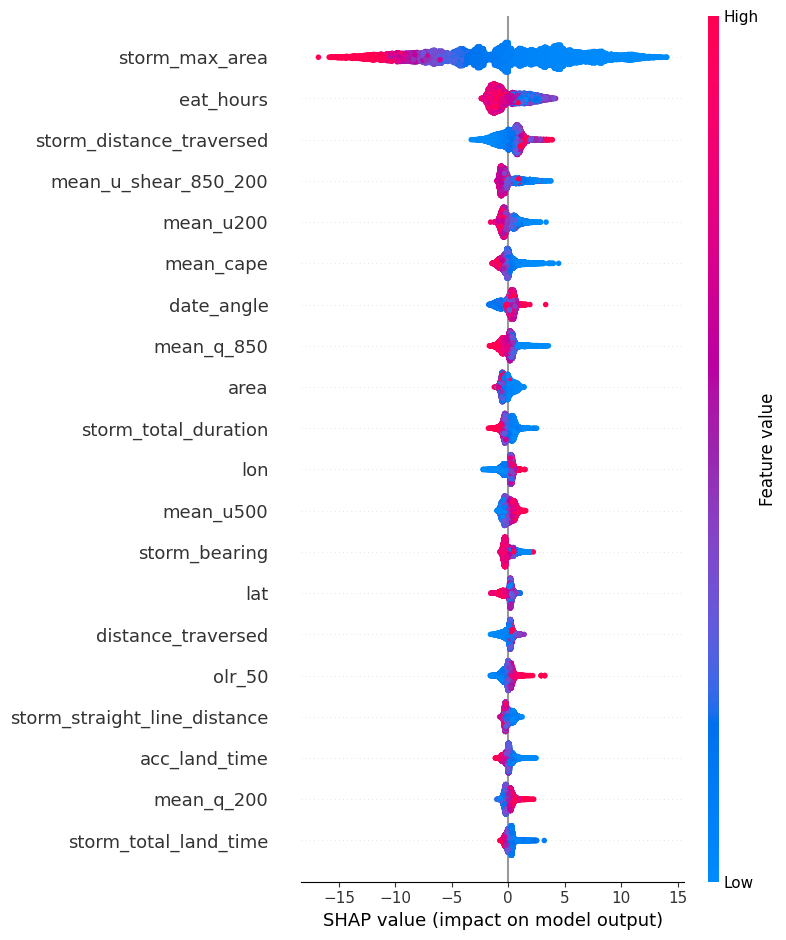

In [15]:
shap.summary_plot(shap_values, X_test)

In [16]:
sweep_id = "0s2hkglk"
sweep = api.sweep(f"{config.WANDB_ENTITY}/{config.WANDB_PROJECT}/{sweep_id}")
runs = sweep.runs

best_run = max(
    runs,
    key=lambda run: run.summary.get("val-rmse", np.inf),
)

In [17]:
best_run = api.run(f"{config.WANDB_ENTITY}/{config.WANDB_PROJECT}/76k1wgf8")

In [18]:
for f in best_run.files():
    if f.name.endswith("_model.json"):
        model_file = f

In [19]:
model_file.download(exist_ok=True)

<_io.TextIOWrapper name='./storm_min_bt_20250819_102733_21c167c8_model.json' mode='r' encoding='UTF-8'>

In [20]:
bst = xgb.Booster()
bst.load_model(f"./{model_file.name}")

In [21]:
explainer = shap.TreeExplainer(bst)

In [22]:
X_test = X_test[config.ERA5_MET_FEATURE_COLS]

In [23]:
shap_values = explainer(X_test)

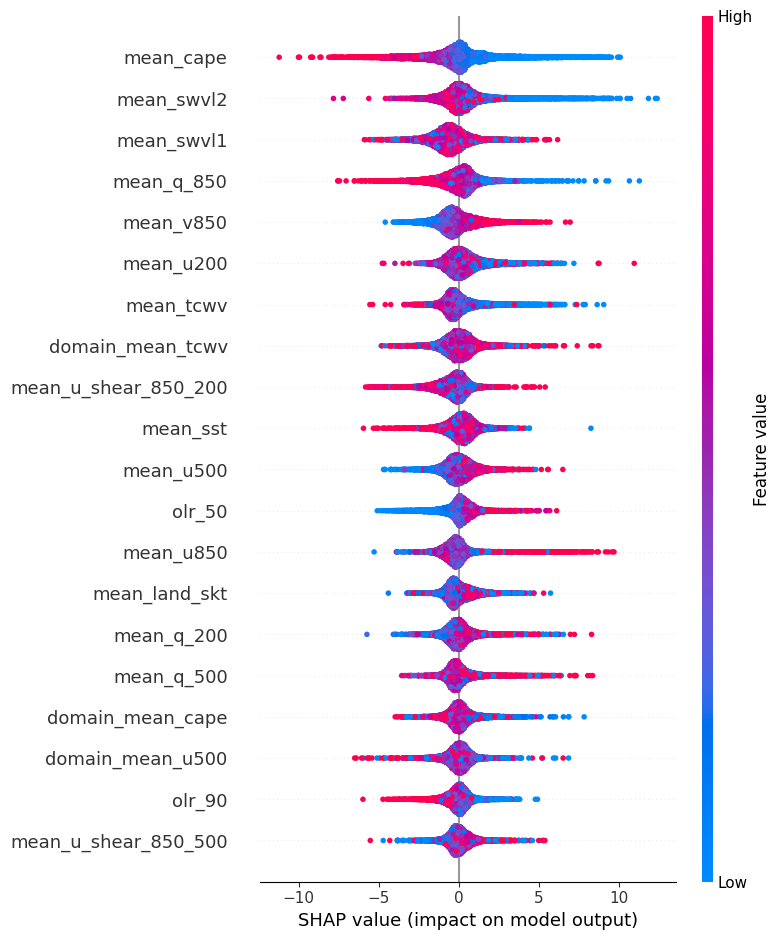

In [24]:
shap.summary_plot(shap_values, X_test)